# Introduction

This year, we will run the practical exercises in Python, a powerful interpreted language. Python is being commonly used in machine learning research, as it is fast, portable, has a clean syntax and sports a large collection of scientific software libraries including GPU-accelerated computing libraries which are often used for training deep neural networks. 

In order to deal with the more advanced mathematics that we deal with in this course, we make use of a few python libraries:

* numpy, which allows us to work with vectors and matrices
* scipy, which gives us access to scientific algorithms
* matplotlib, which allows us to plot our results

For this introduction, we will run our practical exercises within a "*notebook*": an interactive web page that integrates both code and text, allowing us to combine the code with documentation. In this case, you will edit this notebook to write your code and provide answers to the questions. Much of the documentation for python and its libraries can be found online. In particular, you should be able to do the exercises described in this document with the information available at https://docs.scipy.org/doc/scipy/. This introductory exercise is not graded.

Before we start, let's load the libraries that we will need for this exercise. The notebook is organised into "cells", which can contain either code or formatted text. The current cell is a text cell: you can look at and modify the text by selecting the cell and pressing "enter", or by double-clicking on it. The text will be rendered when you then press control-enter or click run in the toolbar above.

To execute the code in a code cell, select the cell (using the mouse or arrow keys) and either click "run", press control-enter, or shift-enter (to run it and move on to the next cell).

In [2]:
# The following line makes sure that when we plot stuff it shows up in the notebook
%matplotlib inline 

import scipy.stats as stats     # Statistics module
import numpy as np              # Module for, among others, matrix operations
import matplotlib.pyplot as plt # Plotting
       
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

print("That went fine")

That went fine


Running the above cell should only have created a new line stating ``That went fine``. If not, install any missing libraries as indicated by the error messages you may get.

# Basic stuff

Now let's play around a little with some data. Start by loading the variables saved in the file "*data.npz*". This can be done using the "**numpy.load**" command. This file contains multiple variables, which can be accessed as elements of a dictionary structure. In the following, we will refer to these variables by their key in the file, so for example, $v$ refers to the vector that you can access as *data['v']* if you called your dictionary "data".

Answer the following questions:

1. What is the dimensionality of $v$?
1. Compute the 2-norm, $|v|^2$, of $v$. Notice that v is relatively large, which can lead to out-of-memory errors if you're not careful. Check out the *numpy.inner* function.
1. use *%timeit* to check how long the computation takes, and report the results
1. How many elements of v are larger than 1? How many are larger than $2, 3,\dots,5$?

In [21]:
from cmath import sqrt
from numpy import linalg

d = np.load("data2.npz")

print("Elements in the file:")
for k in d.keys():
    print("  ",k)

# Your code comes here.
print(d['v'].shape)

# print(linalg.norm(d['v'], None))
%time print(sqrt(np.inner(d['v'], d['v'])))

count = np.array([0, 0, 0, 0, 0])

for i in d['v']:
    if i >= 1:
        count[0] += 1
    if i >= 2:
        count[1] += 1
    if i >= 3:
        count[2] += 1
    if i >= 4:
        count[3] += 1
    if i >= 5:
        count[4] += 1

print(count)

Elements in the file:
   a
   b
   l
   v
   v2
(200000,)
(446.5610474115667+0j)
CPU times: user 0 ns, sys: 9.26 ms, total: 9.26 ms
Wall time: 7.32 ms
[31834  4472   262     9     0]


## Plotting

Plot, in the range $[-5\dots 5]$, the Gaussiab PDFs with parameters $(\mu=0,\sigma^2=1), (\mu=0, \sigma^2=2), (\mu=0, \sigma^2=3)$. Use the functions *plt.plot*, *stats.norm.pdf* and *plt.legend*


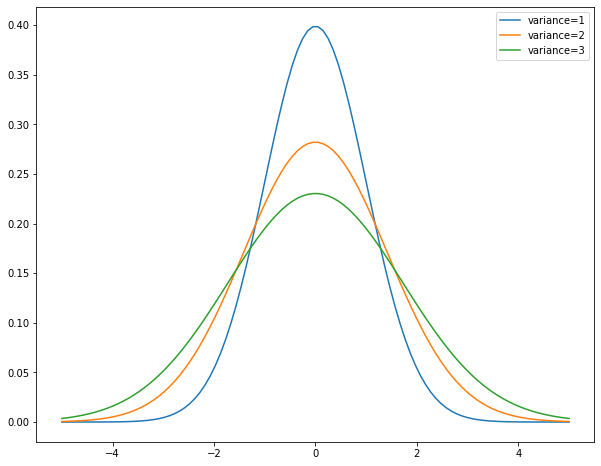

In [4]:
import math
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(-5, 5, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label="variance=1")
variance = 2
sigma = math.sqrt(variance)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label="variance=2")
variance = 3
sigma = math.sqrt(variance)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label="variance=3")
plt.legend()

## Playing with matrices and Python

Plot a normalised histogram of the elements in vector v2 using 20 bins, and superimpose a plot, in the range $[−5, \dots , 5]$ of the Gaussian distribution with the mean and variance of the data. Use the built-in functions to compute these. In particular, you can use **np.mean** and **np.var** to fit the parameters to the data.

(1000,)


(array([5.47809003e-05, 1.97211241e-04, 1.43525959e-03, 4.78785068e-03,
        1.71683341e-02, 4.79771125e-02, 1.09879530e-01, 2.04650487e-01,
        3.13653523e-01, 3.81746182e-01, 3.88517101e-01, 3.15340774e-01,
        2.13119614e-01, 1.16891485e-01, 5.07161575e-02, 1.84282949e-02,
        5.07271137e-03, 1.27091689e-03, 2.51992141e-04, 7.66932604e-05]),
 array([-4.57865762, -4.12229418, -3.66593074, -3.2095673 , -2.75320386,
        -2.29684043, -1.84047699, -1.38411355, -0.92775011, -0.47138667,
        -0.01502323,  0.4413402 ,  0.89770364,  1.35406708,  1.81043052,
         2.26679396,  2.72315739,  3.17952083,  3.63588427,  4.09224771,
         4.54861115]),
 <BarContainer object of 20 artists>)

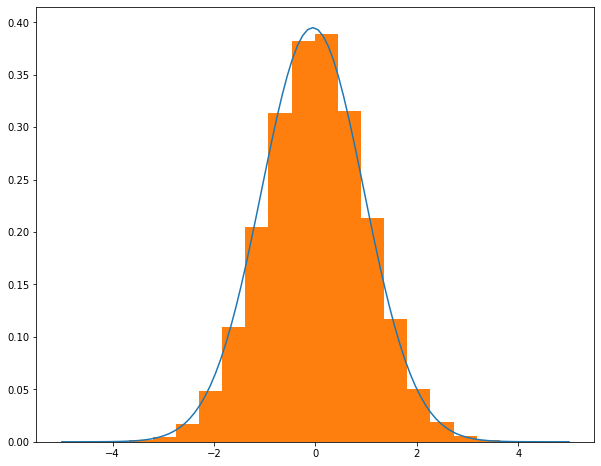

In [19]:
v2 = d["v2"]
print(v2.shape)

# Your code comes here
import math
mu = np.mean(d['v2'])
variance = np.var(d['v2'])
sigma = math.sqrt(variance)
x = np.linspace(-5, 5, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label="variance=1")
plt.hist(d['v'], density=True, bins=20) #, histtype='stepfilled', alpha=0.2

Get information on the *np.var* function using the **help** function. This function does not provide you with the maximum likelihood estimators (MLE) of the parameters. For the Gaussian function, the MLE are 

$$\boldsymbol{\mu} = \frac{\sum_{n=1}^N \mathbf{x}_n}{N}$$ 

and

$$\boldsymbol{\Sigma} = \frac{\sum_{n=1}^N (\mathbf{x}_n-\boldsymbol{\mu})^2}{N}$$

Compute these parameters by hand and compare the values you obtain to those returned by the built-in function. What is the difference due to? How does your implementation compare in terms of execution speed?  
    

In [42]:
%time print(np.mean(v2),np.var(v2))

# help(np.var)
# print(len(v2))

def compute(v2):
    # Your code comes here
    sum = 0
    sum2 = 0
    for i in v2:
        sum = sum + i
    mean = sum/len(v2)
    for i in v2:
        sum2 = sum2 + pow(i-mean, 2)
    var = sum2/len(v2)
    return mean, var

%time print(compute(v2))

    

-0.05312146691764375 1.020791631249708
CPU times: user 862 µs, sys: 346 µs, total: 1.21 ms
Wall time: 911 µs
(-0.05312146691764376, 1.0207916312497085)
CPU times: user 1.34 ms, sys: 0 ns, total: 1.34 ms
Wall time: 1.36 ms


# Visualising 2D data

Load the dataset in **data-2class.npz**. This file contains a set of 2-dimensional points $d$, and a corresponding set of labels $l$

1. Create a 2D scatterplot of $d$, using red for the elements with corresponding label 0, and blue for $l_i=1$

Optional:
1. Draw a straight line separating the two classes
1. Fit two 2D Gaussian distributions, to the points with label $l_i=0$ and $l_i=1$. 
1. Create a heatmap plotting these two distributions and superimpose a scatterplot of the data. 



Elements in the file:
   d
   l
(1000, 1)


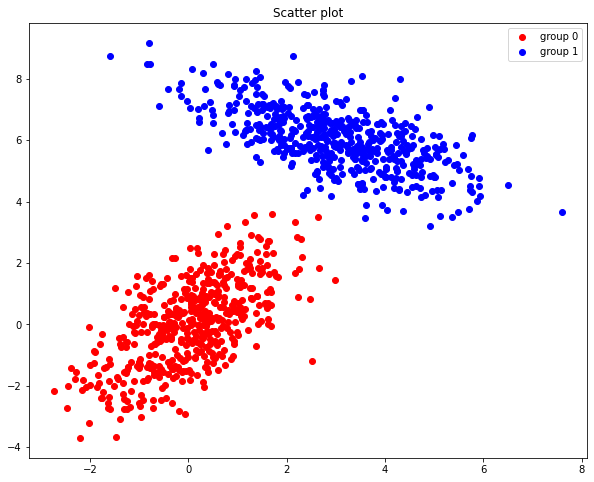

In [48]:
from cProfile import label


data = np.load("data-2class.npz")

print("Elements in the file:")
for k in data.keys():
    print("  ",k)

print(data['l'].shape)

colors = ("red", "blue")
groups = ("l=0", "l=1")
g0 = []
g1 = []

print(data)

for i in range(len(data['d'])):
    if data['l'][i]==0:
        g0.append(data['d'][i])
    else:
        g1.append(data['d'][i])


g0t = np.transpose(g0)
g1t = np.transpose(g1)

plt.scatter(g0t[0], g0t[1], color='red', label="group 0")
plt.scatter(g1t[0], g1t[1], color='blue', label="group 1")

plt.title('Scatter plot')
plt.legend()
plt.show()

# Your code comes here
